<a href="https://colab.research.google.com/github/bavilaa/nlp_got/blob/master/exploring_DB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Y,si             , _ ,
#                ( o o )
#               /'` ' `'\
#               |'''''''|
#               |\\'''//|
#                  """
#BAA

In [0]:
#Activating Google Drive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)




In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
#plotting the index vs rating
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt



In [0]:
route = '/content/drive/My Drive/Colab Notebooks/Project_NLP/'
bd_name =  "scripts_bd.csv"

df = pd.read_csv(route + bd_name)

In [6]:
df.head()

,Unnamed: 0,Season_Episode,Script,Status,Season,Episode
0,0,s01e01,"Easy, boy. What do you exp...",1,1,1
1,1,s01e02,"You need to drink, child. ...",1,1,2
2,2,s01e03,"Welcome, Lord Stark. Grand...",1,1,3
3,3,s01e04,The little lord's been dre...,1,1,4
4,4,s01e05,Does Ser Hugh have any fam...,1,1,5


In [0]:
#Counting the number of words of every Script

df['totalwords'] = df['Script'].str.split().str.len()



In [0]:
df.sort_values(['Season' , 'Episode'])
#reseting the index
df = df.reset_index()


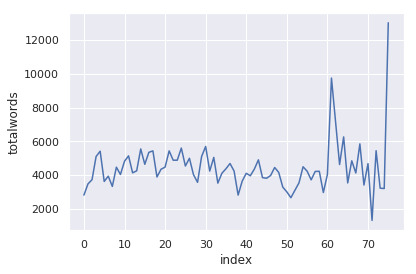

In [9]:
#Plotting number of words by episode
sns.lineplot(x="index", y="totalwords",
legend="full", data=df);

In [0]:
#ok, there are some prblems to resolve:
#-In season 7-8 there are two episodes with to many words
#-In season 7-8 there is an episode with to few words

In [0]:
#But first, lets see a simple comparison between rating and number of words

route = '/content/drive/My Drive/Colab Notebooks/Project_NLP/'
bd_name =  "rating_bd.csv"

df_rating = pd.read_csv(route + bd_name)

In [12]:
df_rating.dtypes

Unnamed: 0      int64
index           int64
Season          int64
Episode         int64
Title          object
Rating        float64
dtype: object

In [0]:
#Merging the two databases
df3 = pd.merge(df,
                 df_rating,
                 on=['Season' , 'Episode'],
                 how='inner')

In [0]:
df3 = df3[['Season','Episode','totalwords','Script','Title','Rating']]

In [0]:
#Sorting and reseting the index
df3.sort_values(['Season' , 'Episode'])
#reseting the index
df3 = df3.reset_index()


Correlation: 0.09119982384205727


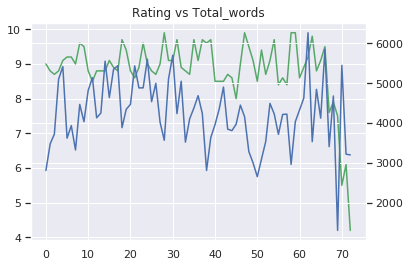

In [16]:
import matplotlib.pyplot as plt
sns.lineplot(data=df3.Rating, color="g")
ax2 = plt.twinx()
sns.lineplot(data=df3.totalwords, color="b", ax=ax2)



plt.title('Rating vs Total_words')

correllation = df3['totalwords'].corr(df3['Rating'])
print ("Correlation: " +str(correllation))



df3.Rating

Correlation: -0.19039906460298858


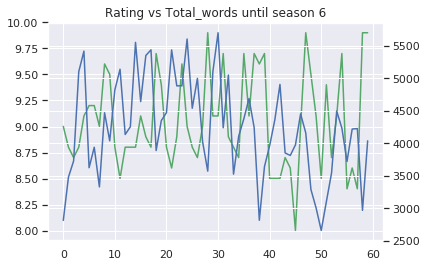

In [17]:
#Plotting only until season 6
df4 = df3[df3.Season<=6]

sns.lineplot(data=df4.Rating, color="g")
ax2 = plt.twinx()
sns.lineplot(data=df4.totalwords, color="b", ax=ax2)

plt.title('Rating vs Total_words until season 6')

correllation = df4['totalwords'].corr(df4['Rating'])
print ("Correlation: " +str(correllation))




Correlation: -0.23776875366043118


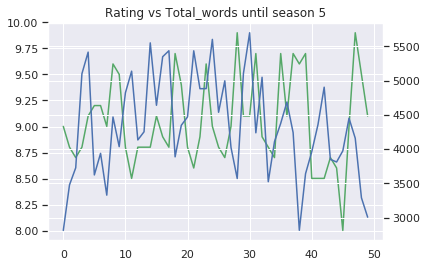

In [18]:
#Plotting only until season 5
df4 = df3[df3.Season<=5]

sns.lineplot(data=df4.Rating, color="g")
ax2 = plt.twinx()
sns.lineplot(data=df4.totalwords, color="b", ax=ax2)

plt.title('Rating vs Total_words until season 5')

correllation = df4['totalwords'].corr(df4['Rating'])
print ("Correlation: " +str(correllation))

Correlation: -0.34282891868291626


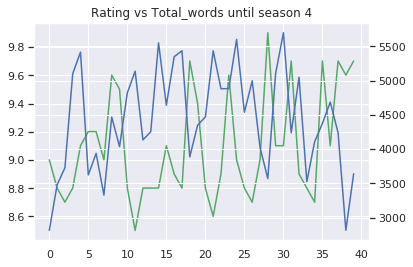

In [19]:
#Plotting only until season 4
df4 = df3[df3.Season<=4]

sns.lineplot(data=df4.Rating, color="g")
ax2 = plt.twinx()
sns.lineplot(data=df4.totalwords, color="b", ax=ax2)

plt.title('Rating vs Total_words until season 4')

correllation = df4['totalwords'].corr(df4['Rating'])
print ("Correlation: " +str(correllation))

### OK, there is a lot of noise in the Scripts:

#### Scripts must be cleaned:


-Some scripts have a lot of descriptions of the scene

-Others scripts includes the name of the character who is talking.

### 1.-Trying to capture messages inside parentheses

There are a lot of scripts with messages inside parentheses 
describing actions of the chracaters. 

In [0]:
import re

In [0]:
#patterb to find all the messages inside parentheses:
pattern = "\(.+?\)"
#and also messages into brackets
pattern2 = "\[.+?\]"



df3['Script_2'] = df3['Script'].apply(lambda x: re.sub(pattern,'', str(x)))
df3['Script_2'] = df3['Script_2'].apply(lambda x: re.sub(pattern2,'', str(x)))



In [0]:
#Removing all the special characters
pattern3 = '[^a-zA-Z0-9- ]+'
df3['Script_3'] = df3['Script_2'].apply(lambda x: re.sub(pattern3,'', str(x)))

#To Lower
df3['Script_3'] = df3['Script_3'].str.lower()

###Plotting some word frequency

9


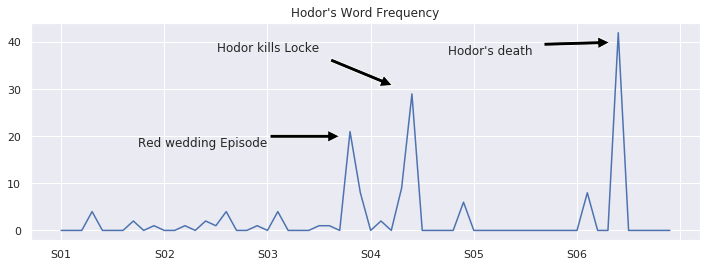

In [23]:
#Is Hodor the key of everithing?

df3['hodor'] = df3.Script_3.str.count('hodor')
fig, ax = plt.subplots(figsize=(12, 4))

fig.canvas.draw()
df4 = df3[df3.Season<=6]


#Plotting only until season 6

sns.lineplot(data=df4.hodor, color="b")

#plt.ylim(0, 50)

plt.title("Hodor's Word Frequency")




ax.annotate("Hodor's death", xy=(54, 40),  xycoords='data',
           xytext=(0.75, 0.9), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.10),
            horizontalalignment='right', verticalalignment='top',
            )


ax.annotate("Red wedding Episode", xy=(27, 20),  xycoords='data',
            xytext=(20, 20), textcoords='data',
            arrowprops=dict(facecolor='black', shrink=0.000001),
            horizontalalignment='right', verticalalignment='top',
            )


ax.annotate("Hodor kills Locke", xy=(33, 30),  xycoords='data',
            xytext=(25, 40), textcoords='data',
            arrowprops=dict(facecolor='black', shrink=0.11),
            horizontalalignment='right', verticalalignment='top',
            )

#ax.locator_params(axis='x', nbins=20)

labels = [item for item in ax.get_xticklabels()]
#labels[3] = 'Testing'
#ax.set_xticklabels(labels)



ax.set_xticks([0,10,20,30,40,50,60])
ax.set_xticklabels(['S01','S02','S03','S04','S05','S06'])

print(len(labels))




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'Rating vs Hodor')

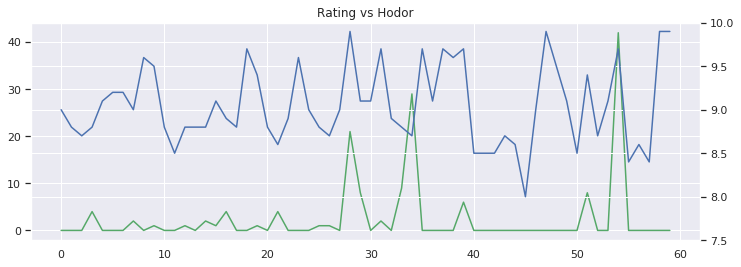

In [24]:
#Is Hodor the key of everithing?
fig, ax = plt.subplots(figsize=(12, 4))
df4 = df3[df3.Season<=6]
df4['hodor'] = df4.Script_3.str.count('hodor')

#Plotting only until season 6

sns.lineplot(data=df4.hodor, color="g")

#plt.ylim(0, 50)
ax2 = plt.twinx()
sns.lineplot(data=df4.Rating, color="b", ax=ax2)
plt.ylim(7.5, 10)

plt.title('Rating vs Hodor')


#ax.annotate("hola" ,(1,))


In [25]:
df4['hodor'].sum()

147